# *Regression in Marketing*

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
from bs4 import BeautifulSoup
from lxml import etree
import requests

# Initialize parser
parser = etree.HTMLParser()

# First page
url = "https://admn5015-340805.uc.r.appspot.com/2018-01-01.html"

# Open URL
respose = requests.get(url, timeout=15)
html = respose.text

In [3]:
from datetime import datetime, timedelta
import csv
import requests
from bs4 import BeautifulSoup

def fetch_daily_data(date_string):
    target_url = f"https://admn5015-340805.uc.r.appspot.com/{date_string}.html"
    page_response = requests.get(target_url)

    if page_response.status_code != 200:
        print(f"Unable to access data for {date_string}")
        return None

    html_parser = BeautifulSoup(page_response.text, 'html.parser')

    # Assuming these are the correct id selectors for your webpage elements
    price_value = html_parser.find("td", {"id": "price"}).text
    likes_count = html_parser.find("td", {"id": "likes"}).text
    dislikes_count = html_parser.find("td", {"id": "dislikes"}).text
    follower_count = html_parser.find("td", {"id": "followers"}).text

    return {
        'date': date_string,
        'price': price_value,
        'likes': likes_count,
        'dislikes': dislikes_count,
        'followers': follower_count
    }

initial_date = datetime(2018, 1, 1)
final_date = datetime(2023, 12, 31)
one_day = timedelta(days=1)

with open('collected_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['date', 'price', 'likes', 'dislikes', 'followers']
    data_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    data_writer.writeheader()

    current_date = initial_date
    while current_date <= final_date:
        daily_data = fetch_daily_data(current_date.strftime('%Y-%m-%d'))
        if daily_data:
            data_writer.writerow(daily_data)
        current_date += one_day


In [5]:
df = pd.read_csv("/content/collected_data.csv")
df.head()

,date,price,likes,dislikes,followers
0,2018-01-01,$ 1006.39 CAD,9001,402,15002
1,2018-01-02,$ 1011.81 CAD,9003,403,15003
2,2018-01-03,$ 1017.26 CAD,9004,405,15004
3,2018-01-04,$ 1022.74 CAD,9006,407,15006
4,2018-01-05,$ 1028.25 CAD,9008,408,15008


In [6]:
#Cleaning the data

df['date'] = pd.to_datetime(df['date'])

# Cleaning and converting 'price' to numerical format
# Removing currency symbols and any other non-numeric characters, then converting to float
df['price'] = df['price'].replace('[\$,CAD]', '', regex=True).astype(float)


In [7]:
df.head()

,date,price,likes,dislikes,followers
0,2018-01-01,1006.39,9001,402,15002
1,2018-01-02,1011.81,9003,403,15003
2,2018-01-03,1017.26,9004,405,15004
3,2018-01-04,1022.74,9006,407,15006
4,2018-01-05,1028.25,9008,408,15008


In [8]:
#descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2191.0,117997.803432,166245.774920,1006.39,7312.32,34942.15,162689.8,445911.69
likes,2191.0,11127.217252,1267.897539,9001.00,10001.00,11202.00,12199.5,13396.00
dislikes,2191.0,2064.840712,959.902626,402.00,1234.50,2071.00,2893.0,3714.00
followers,2191.0,17125.631219,1261.799955,15002.00,16011.00,17199.00,18199.0,19377.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2191 non-null   datetime64[ns]
 1   price      2191 non-null   float64       
 2   likes      2191 non-null   int64         
 3   dislikes   2191 non-null   int64         
 4   followers  2191 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 85.7 KB


In [10]:
df.isna().sum()

date         0
price        0
likes        0
dislikes     0
followers    0
dtype: int64

In [11]:
#dropping date column to put the data into the model

df = df.drop('date', axis=1)

In [12]:
df.head()

,price,likes,dislikes,followers
0,1006.39,9001,402,15002
1,1011.81,9003,403,15003
2,1017.26,9004,405,15004
3,1022.74,9006,407,15006
4,1028.25,9008,408,15008


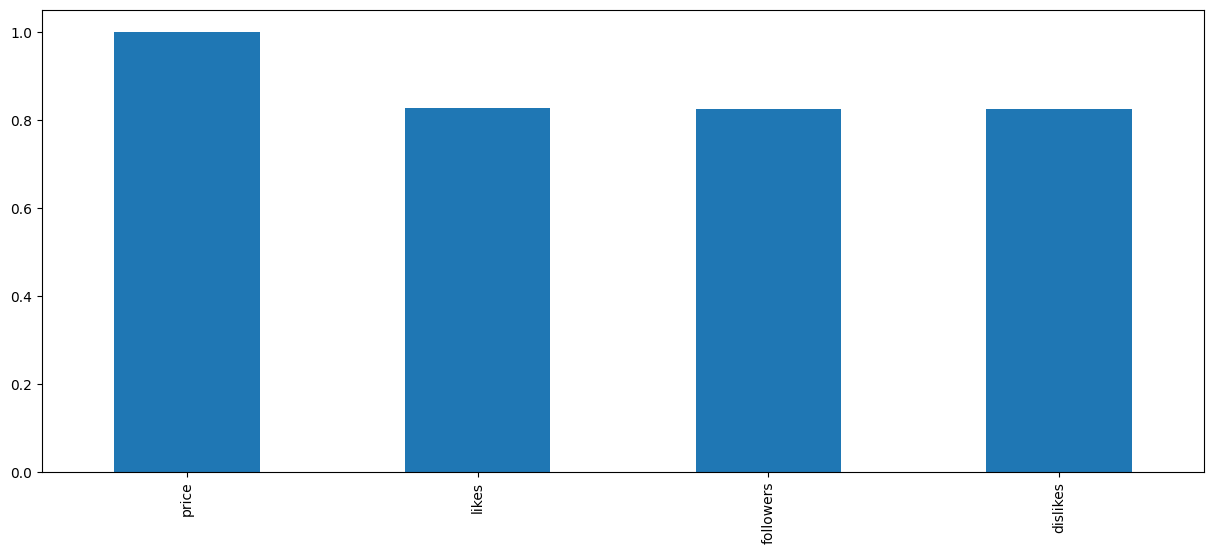

In [14]:
# Plot data

plt.figure(figsize=(15,6))
bars = df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

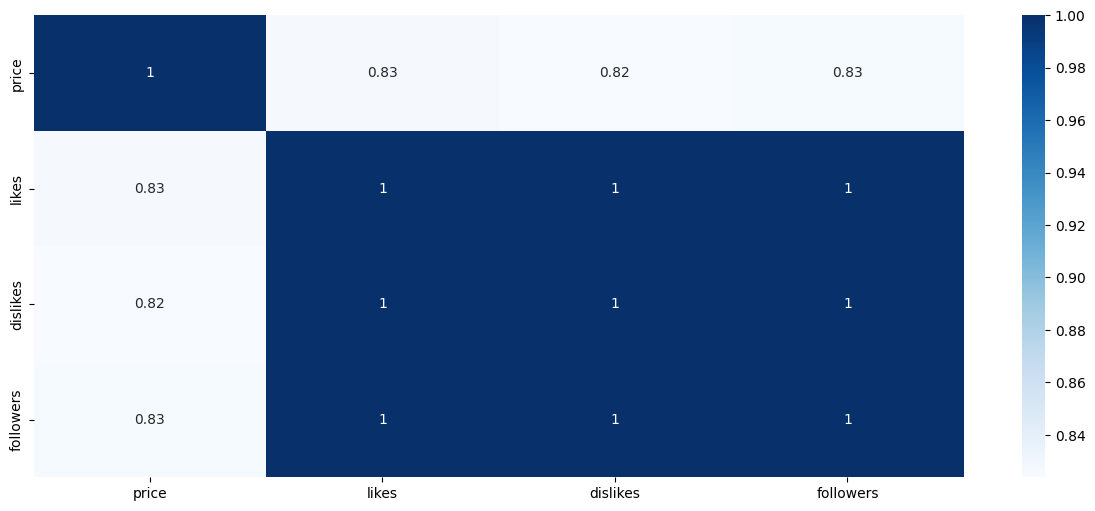

In [16]:
# Create a heatmap

plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

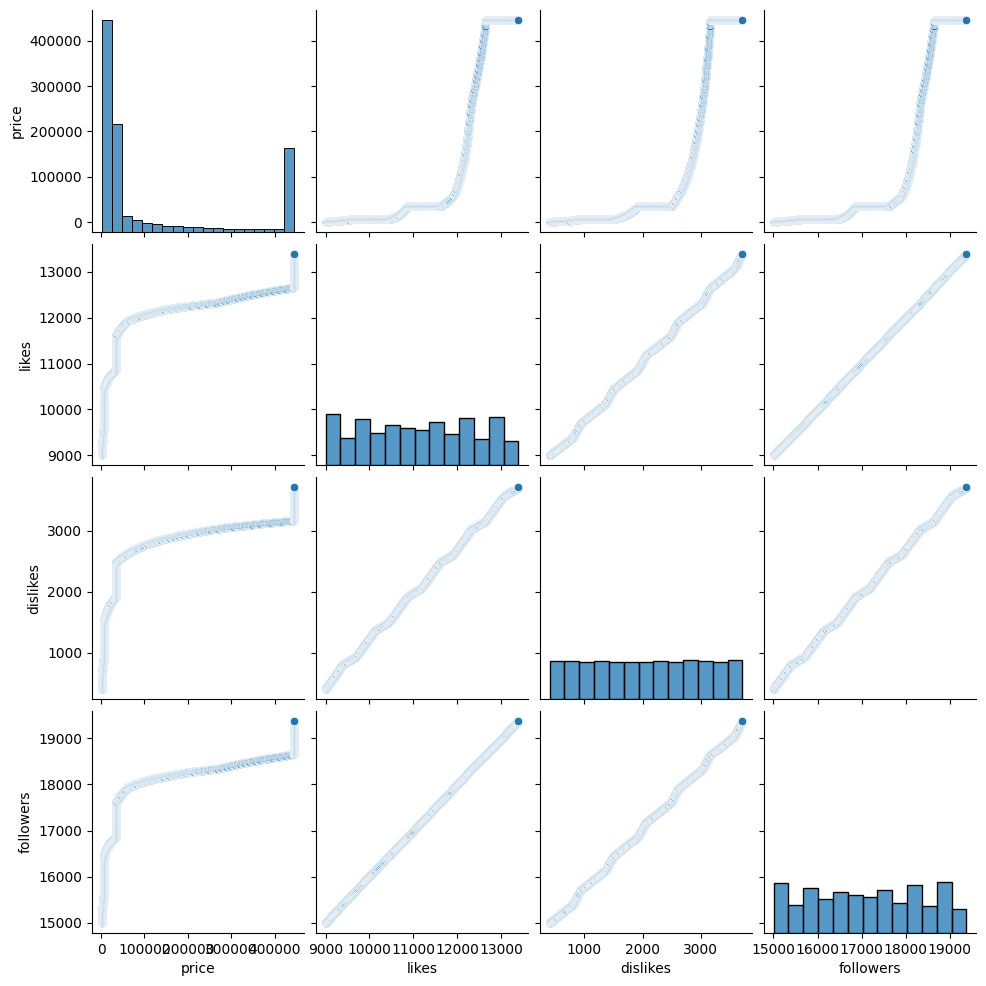

In [17]:
sns.pairplot(df)

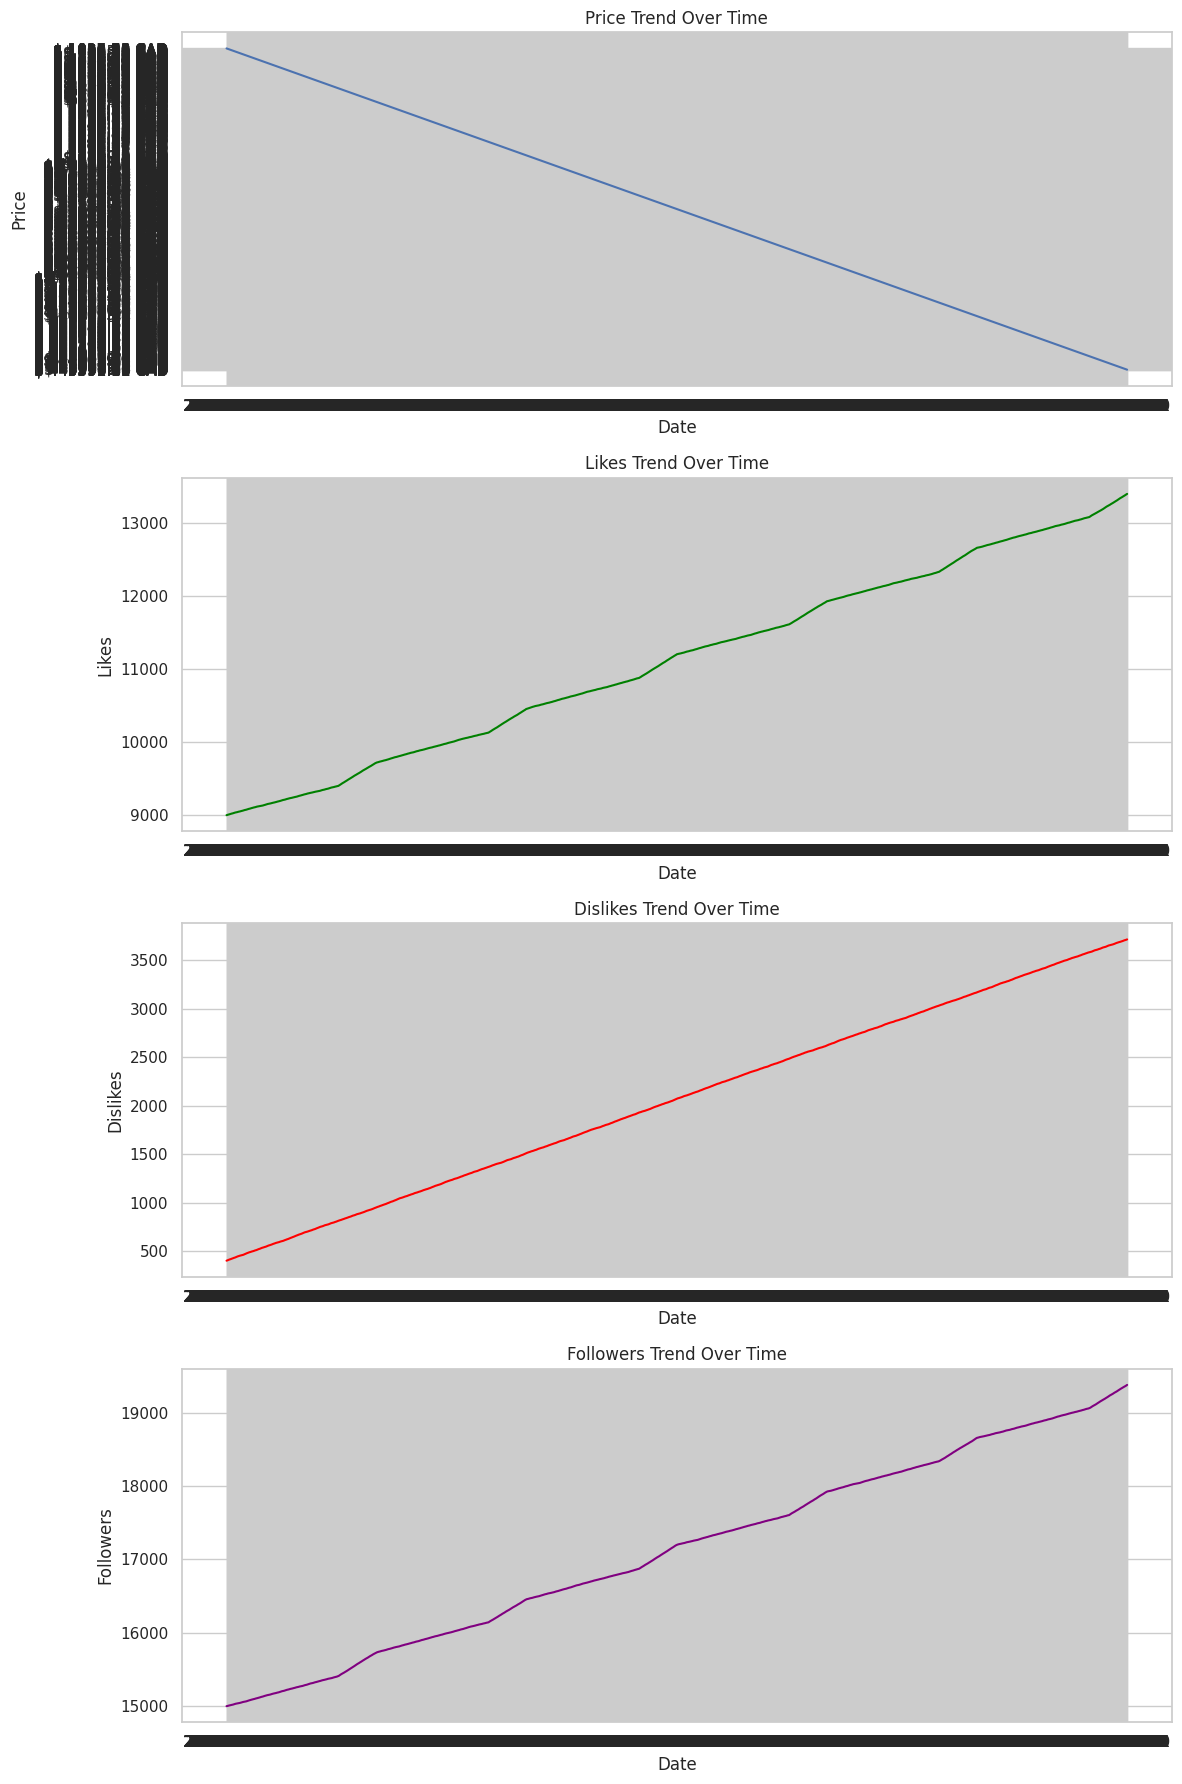

In [20]:
data = pd.read_csv("/content/collected_data.csv")

# Setting the style for seaborn plots
sns.set(style="whitegrid")

# Plotting trends over time for 'price', 'likes', 'dislikes', and 'followers'
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Price trend
sns.lineplot(x='date', y='price', data=data, ax=axes[0])
axes[0].set_title('Price Trend Over Time')
axes[0].set_ylabel('Price')
axes[0].set_xlabel('Date')

# Likes trend
sns.lineplot(x='date', y='likes', data=data, ax=axes[1], color='green')
axes[1].set_title('Likes Trend Over Time')
axes[1].set_ylabel('Likes')
axes[1].set_xlabel('Date')

# Dislikes trend
sns.lineplot(x='date', y='dislikes', data=data, ax=axes[2], color='red')
axes[2].set_title('Dislikes Trend Over Time')
axes[2].set_ylabel('Dislikes')
axes[2].set_xlabel('Date')

# Followers trend
sns.lineplot(x='date', y='followers', data=data, ax=axes[3], color='purple')
axes[3].set_title('Followers Trend Over Time')
axes[3].set_ylabel('Followers')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()


In [21]:
# Define your features (X) and target (y)
x = df[['likes','dislikes','followers']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [22]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [23]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e+12, tolerance: 4.242e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e+12, tolerance: 3.827e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+12, tolerance: 3.854e

In [25]:
# Order model results

df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
0,RandomForestRegressor,0.05,330
0,DecisionTreeRegressor,0.0,597
0,XGBRegressor,0.02,1493
0,Ridge,0.0,89586
0,Lars,0.0,89586
0,ARDRegression,0.0,89622
0,BayesianRidge,0.0,89631
0,ElasticNet,0.0,92150
0,OrthogonalMatchingPursuit,0.0,92566
0,HuberRegressor,0.0,109717


In [26]:
# Evaluate the best model

regressor = RandomForestRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

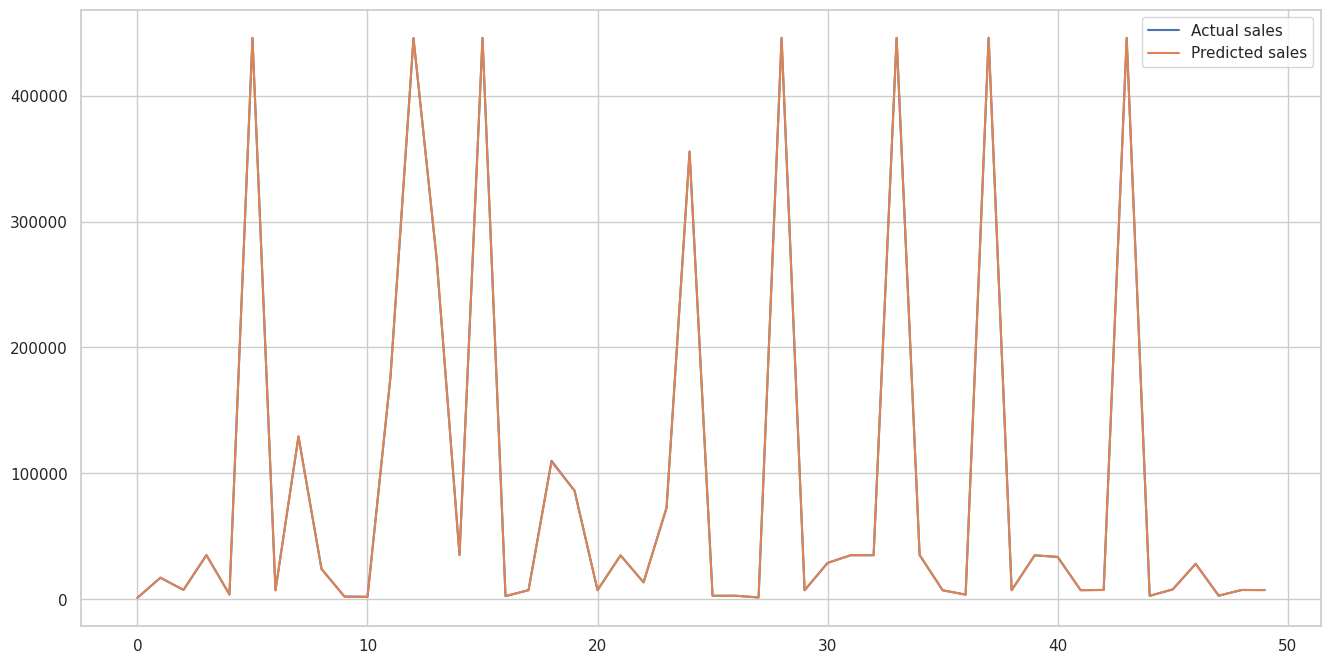

In [27]:
# Plot

test = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])

In [29]:
# Predicting price for 1st January 2024, Assuming likes = 9020, dislikes = 416, followers = 15020

temp_data = {   'likes' : [9080],
                'dislikes' : [420.0],
                'followers' : [15000.0],
        }

data_input = pd.DataFrame(temp_data, columns = ['likes', 'dislikes', 'followers'])

data_prediction_result = model.predict(data_input)

data_prediction_result

array([1134.2739])

# My Findings

The heatmap indicates a strong positive correlation between 'price', 'likes', 'dislikes', and 'followers', with darker shades of blue representing higher correlation values. 'Likes', 'dislikes', and 'followers' are almost perfectly correlated with each other, and all are strongly correlated with 'price', suggesting that increases in social engagement metrics are associated with increases in price.

The pairplot demonstrates significant positive correlations among the variables: 'price', 'likes', 'dislikes', and 'followers'. The distribution of 'price' shows a skew towards higher values along with a few outliers. 'Likes', 'dislikes', and 'followers' appear to increase linearly in relation to one another, while their relationship with 'price' seems to be more exponential, indicating the potential need for more sophisticated modeling techniques for accurate price prediction. The distributions of 'likes', 'dislikes', and 'followers' do not exhibit noticeable outliers or skewness.

The RandomForestRegressor model outperforms the others in terms of prediction accuracy, having the lowest RMSE value of 330. Other models, such as the DecisionTreeRegressor and XGBRegressor, show higher RMSE scores, reflecting lower accuracy in predictions. The remaining models exhibit much higher RMSE values, indicating a decrease in their predictive performance. Additionally, I observe that the RandomForestRegressor maintains a balance between accuracy and efficiency with a reasonable run time.